In [39]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import keras
import matplotlib.pyplot as plt

In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

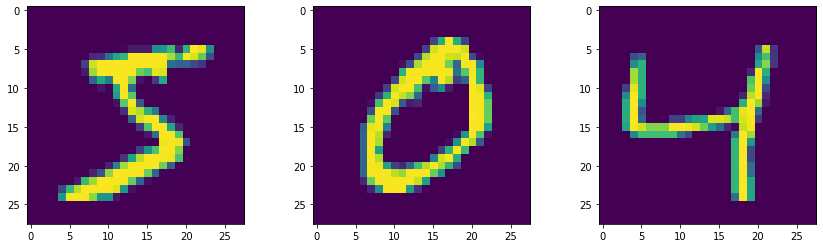

In [42]:
plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(x_train[0])

plt.subplot(1, 3, 2)
plt.imshow(x_train[1])

plt.subplot(1, 3, 3)
plt.imshow(x_train[2])

plt.subplots_adjust(right=2)
plt.show()

In [43]:
y_train[0], y_train[1], y_train[2]

(5, 0, 4)

In [44]:
x_test.shape

(10000, 28, 28)

In [45]:
X = x_train[:200]
y = y_train[:200]

In [46]:
X = X.T
y.resize((200,1))
y = y.T

In [47]:
pd.Series(y[0]).value_counts()

1    26
9    23
7    21
4    21
3    21
0    21
2    20
6    19
8    15
5    13
dtype: int64

In [48]:
y.shape

(1, 200)

In [49]:
for i in range(y.shape[1]):
    if y[0][i] > 4:
        y[0][i] = 1
    else:
        y[0][i] = 0

In [50]:
pd.Series(y[0]).value_counts()

0    109
1     91
dtype: int64

In [51]:
f = np.random.uniform(size=(5,5,3))

In [52]:
f[:, :, 0]

array([[0.74852596, 0.61762507, 0.64545863, 0.82331564, 0.62314652],
       [0.47227943, 0.88166953, 0.7461832 , 0.06374624, 0.16310798],
       [0.14690438, 0.61762615, 0.52263023, 0.69321278, 0.50251451],
       [0.40499091, 0.6702729 , 0.06716098, 0.76426413, 0.1808839 ],
       [0.39967995, 0.45493515, 0.41739423, 0.25026789, 0.74027204]])

In [53]:
f[:, :, 1]

array([[0.51026441, 0.19320666, 0.17705088, 0.14815746, 0.61877649],
       [0.36821667, 0.09911834, 0.44179099, 0.9963137 , 0.08483858],
       [0.05357769, 0.9239122 , 0.76104363, 0.33218499, 0.94052953],
       [0.08706803, 0.77803826, 0.63019825, 0.13363406, 0.5821109 ],
       [0.17560298, 0.66449518, 0.28678551, 0.427317  , 0.88778844]])

In [54]:
f[:, :, 2]

array([[0.49945972, 0.8850209 , 0.46141879, 0.81893649, 0.28365703],
       [0.75743282, 0.5096184 , 0.85427796, 0.37515298, 0.52252303],
       [0.20820877, 0.06219329, 0.60450538, 0.64080138, 0.67511513],
       [0.8987963 , 0.23078872, 0.92686067, 0.98587874, 0.81808825],
       [0.02383958, 0.92855069, 0.86595225, 0.49605635, 0.54271894]])

In [55]:
X.shape, y.shape, f.shape

((28, 28, 200), (1, 200), (5, 5, 3))

In [56]:
new_image = []

for k in range(X.shape[2]):
    for i in range(X.shape[0] - f.shape[0] + 1):
        for j in range(X.shape[1] - f.shape[1] + 1):
            new_image.append(X[:,:,k][i:i+f.shape[0],j:j+f.shape[1]])

new_image = np.array(new_image)
new_image.resize((X.shape[2], int(new_image.shape[0]/X.shape[2]), new_image.shape[1], new_image.shape[2]))
new_image.shape

(200, 576, 5, 5)

In [57]:
s_row = X.shape[0] - f.shape[0] + 1
s_col = X.shape[1] - f.shape[1] + 1
num_filter = f.shape[2]

inputlayer_neurons = s_row * s_col * num_filter
output_neurons = 1

wo = np.random.uniform(size=(inputlayer_neurons, output_neurons))

In [58]:
wo.shape

(1728, 1)

In [59]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [60]:
def derivatives_sigmoid(x):
    return x * (1 - x)

In [61]:
filter_output = []

for i in range(len(new_image)):
    for k in range(f.shape[2]):
        for j in range(new_image.shape[1]):
            filter_output.append((new_image[i,j]*f[:,:,k]).sum())

filter_output = np.resize(np.array(filter_output), (len(new_image), f.shape[2], new_image.shape[1]))
filter_output.shape

(200, 3, 576)

In [62]:
filter_output_sigmoid = sigmoid((filter_output))
filter_output_sigmoid.shape

(200, 3, 576)

In [63]:
filter_output_sigmoid = filter_output_sigmoid.reshape((filter_output_sigmoid.shape[0], filter_output_sigmoid.shape[1]*filter_output_sigmoid.shape[2]))
filter_output_sigmoid.shape

(200, 1728)

In [64]:
filter_output_sigmoid = filter_output_sigmoid.T
filter_output_sigmoid.shape

(1728, 200)

In [65]:
output_layer_input = np.dot(wo.T, filter_output_sigmoid)
output_layer_input = (output_layer_input - np.average(output_layer_input))/np.std(output_layer_input)
output = sigmoid(output_layer_input)
output.shape

(1, 200)

In [66]:
error = np.square(y-output)/2
error_wrt_output = -(y-output)
output_wrt_output_layer_input = output * (1 - output)
output_wrt_w = filter_output_sigmoid

In [67]:
lr = 0.01

In [68]:
wo = wo - lr * (error_wrt_output * output_wrt_output_layer_input * output_wrt_w)

In [69]:
output_layer_input_wrt_filter_output_sigmoid = wo.T

filter_output_sigmoid_wrt_filter_output = filter_output_sigmoid * (1 - filter_output_sigmoid)

error_wrt_filter_output = np.dot(output_layer_input_wrt_filter_output_sigmoid.T, error_wrt_output * output_wrt_output_layer_input) * filter_output_sigmoid_wrt_filter_output

error_wrt_filter_output = np.average(error_wrt_filter_output, axis=1)
error_wrt_filter_outpu.shape
error_wrt_filter_output = np.resize(error_wrt_filter_output, X.shape[0]-f.shape[0]+1, X.shape[1]-f.shape[1]+1, f.shape[2])
error_wrt_filter_outpu.shape

ValueError: shapes (1728,200) and (1,200) not aligned: 200 (dim 1) != 1 (dim 0)